In [1]:
!pip install -q seaborn
!pip install tensorflow


In [133]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [134]:
dataset_fd = np.load('datasets/fullData.npy')
dataset_fl = np.load('datasets/fullLabels.npy')
print(dataset_fl)

[[0.    0.35  0.    0.005]
 [0.    0.35  0.5   0.005]
 [0.    0.35  1.    0.005]
 ...
 [3.    0.7   0.    0.955]
 [3.    0.7   0.    0.955]
 [3.    0.7   0.    0.955]]


In [135]:
def createList(ini,fin):
  return list(range(ini,fin+1))

iniC = 1
finC = 400  
column_generator = createList(iniC,finC)
column_nameS =list(map(str,column_generator))
column_nameL = ['AAngle']

In [136]:

dfS = pd.DataFrame(dataset_fd,
                  columns = column_nameS)
dfL  = pd.DataFrame(dataset_fl[:,3],
                  columns = column_nameL)
df = pd.concat([dfS, dfL], axis=1, sort=False)
                  
dataset = df.copy()
dataset.tail()

,1,2,3,4,5,6,7,8,9,10,...,392,393,394,395,396,397,398,399,400,AAngle
60021,0.000131,-0.000863,-0.001084,-0.000268,0.000736,0.000901,0.000203,-0.000420,-0.000281,0.000229,...,-0.003217,-0.002835,-0.001402,0.000676,0.002539,0.003105,0.001942,-0.000203,-0.001912,0.955
60022,-0.000658,-0.000630,0.000085,0.000527,0.000088,-0.000685,-0.000726,0.000216,0.001182,0.001090,...,0.000457,-0.001369,-0.002544,-0.002129,-0.000216,0.001815,0.002387,0.001215,-0.000472,0.955
60023,-0.000148,0.000125,0.000121,-0.000384,-0.000964,-0.001003,-0.000300,0.000723,0.001350,0.001129,...,0.000508,-0.000339,-0.000793,-0.000860,-0.000638,-0.000142,0.000529,0.001044,0.001065,0.955
60024,0.000247,0.000923,0.000770,0.000110,-0.000297,-0.000171,0.000026,-0.000174,-0.000527,-0.000414,...,-0.001145,-0.002762,-0.002686,-0.001368,0.000268,0.001513,0.002008,0.001572,0.000266,0.955
60025,-0.000393,-0.000986,-0.000978,-0.000662,-0.000232,0.000307,0.000812,0.000894,0.000334,-0.000522,...,-0.001596,-0.003036,-0.002616,-0.000620,0.001522,0.002318,0.001430,-0.000193,-0.001312,0.955


In [137]:
X = dataset[column_nameS].values
y = dataset['AAngle'].values

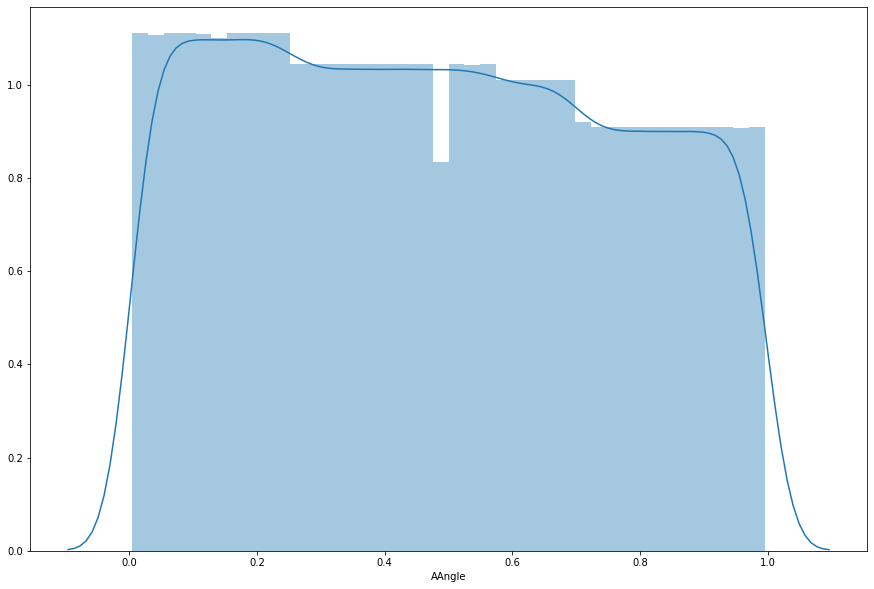

In [138]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['AAngle'])

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [140]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
y_pred = regressor.predict(X_test)

In [145]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,0.085,0.425573
1,0.560,0.438710
2,0.695,0.446436
3,0.865,0.500572
4,0.015,0.440175
5,0.895,0.434970
6,0.225,0.550464
7,0.635,0.464754
8,0.885,0.501133
9,0.325,0.472724


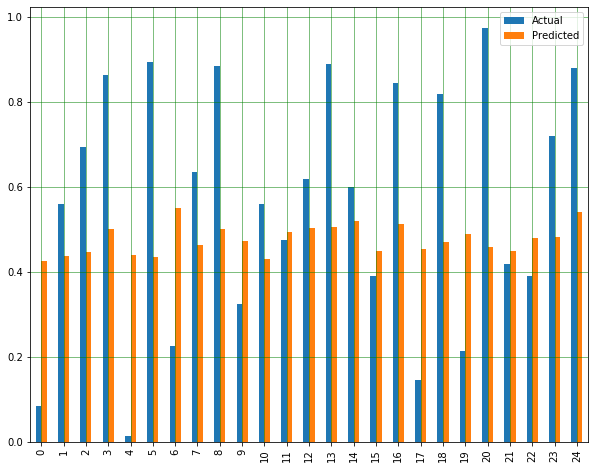

In [147]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2473782703865056
Mean Squared Error: 0.08149574567819494
Root Mean Squared Error: 0.2854745972555088


In [45]:

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [46]:
model = build_model()

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                25792     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 30,017
Trainable params: 30,017
Non-trainable params: 0
_________________________________________________________________


In [48]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [74]:


EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, batch_size=10, verbose=0)
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])


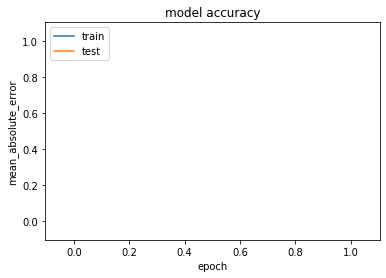

In [80]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

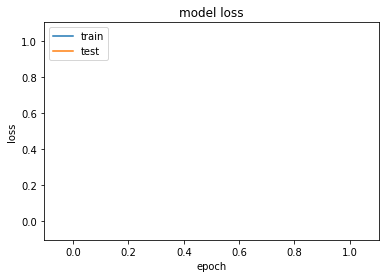

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()